In [43]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split


import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost.sklearn import XGBClassifier, XGBRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from pprint import pprint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score, r2_score, mean_squared_error
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
import timeit
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn import linear_model, tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
import warnings
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image  

from xgboost import plot_tree
from scipy.stats.stats import pearsonr
warnings.filterwarnings('ignore')

In [103]:
df = pd.read_csv('model_db.csv', sep=',')

In [104]:
df

,work_year,salary_in_usd,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_Germany,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
0,2023,95847.0,100,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2023,36000.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2023,31500.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2023,175000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,120000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,2020,342000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3726,2021,149000.0,100,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3727,2020,92000.0,100,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3728,2020,87000.0,100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [105]:
column = df.columns

In [106]:
X = df.drop(['salary_in_usd'], axis = 1)
y = df.salary_in_usd

In [107]:
y

0        95847.0
1        36000.0
2        31500.0
3       175000.0
4       120000.0
          ...   
3725    342000.0
3726    149000.0
3727     92000.0
3728     87000.0
3729     96665.0
Name: salary_in_usd, Length: 3730, dtype: float64

In [108]:
df

,work_year,salary_in_usd,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_Germany,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
0,2023,95847.0,100,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,2023,36000.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2023,31500.0,100,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2023,175000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,120000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3725,2020,342000.0,100,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3726,2021,149000.0,100,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3727,2020,92000.0,100,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3728,2020,87000.0,100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [109]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [110]:
x_train

,work_year,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,job_title_Data Engineer,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_Germany,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
2860,2022,100,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2492,2022,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2456,2022,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
689,2023,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3192,2022,100,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,2023,100,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1346,2022,100,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3454,2021,100,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
3437,2022,100,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [111]:
X.describe()

,work_year,remote_ratio,experience_level_2. Mid_Intermediate_level,experience_level_3. Senior_level,experience_level_4. Executive_level,employment_type_Freelancer,employment_type_Full_Time,employment_type_Part_Time,job_title_Data Analyst,job_title_Data Engineer,...,country_employee_residence_India,country_employee_residence_Others,country_employee_residence_Spain,country_employee_residence_United Kingdom of Great Britain and Northern Ireland,country_employee_residence_United States of America,country_company_location_Germany,country_company_location_Others,country_company_location_Spain,country_company_location_United Kingdom of Great Britain and Northern Ireland,country_company_location_United States of America
count,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,...,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000
mean,2022.383914,46.126005,0.213673,0.674531,0.030563,0.002413,0.991689,0.003485,0.162735,0.278016,...,0.016354,0.089544,0.021180,0.044772,0.805362,0.014745,0.080697,0.020375,0.046113,0.814745
std,0.679595,48.624195,0.409953,0.468613,0.172154,0.049068,0.090797,0.058941,0.369173,0.448081,...,0.126849,0.285566,0.144002,0.206831,0.395975,0.120548,0.272406,0.141299,0.209757,0.388556
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2022.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2023.000000,100.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2023.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
np.linspace(10, 100, 10, endpoint=True)

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [113]:
np.linspace(5, x_train.shape[1], 10, endpoint=True).astype(int)


array([ 5,  7, 10, 13, 16, 18, 21, 24, 27, 30])

In [114]:
#### Adaptative Boosting Regressor ####
Pipeline_AdaBoost=Pipeline(steps=[("Scaler",StandardScaler()),("AdaBoost",AdaBoostRegressor())])

Param_AdaBoost = {
'AdaBoost__n_estimators': list(range(1,10)),
'AdaBoost__random_state': [123],
'AdaBoost__learning_rate': np.logspace(-10, 1, 10)
}

Grid_AdaBoost = GridSearchCV(estimator=Pipeline_AdaBoost, param_grid=Param_AdaBoost,scoring='r2',cv=10) 

#### Gradient Boosting Regressor ####
Pipeline_GBoost=Pipeline(steps=[("Scaler",StandardScaler()),("GradientBoost",GradientBoostingRegressor())])

Param_GBoost = {
'GBoost__max_depth': np.linspace(1, 20, 10, endpoint=True),
'GBoost__max_features': list(range(1,x_train.shape[1])),
'GBoost__learning_rate': np.logspace(-10, 1, 5),
'GBoost__n_estimators': list(range(1,50)),
'GBoost__subsample': np.linspace(0.5, 0.9, 5, endpoint=True)
}

Grid_GBoost = GridSearchCV(estimator=Pipeline_GBoost, param_grid=Param_GBoost,scoring='r2',cv=10) 
Grid_GBoost = RandomizedSearchCV(estimator=Pipeline_GBoost, param_distributions=Param_GBoost, scoring='r2', cv=10, n_iter=1000)


#### Extreme Gradient Boosting Regressor ####
Pipeline_XGBoost=Pipeline(steps=[("Scaler",StandardScaler()),("XGBoost",XGBRegressor(verbosity=0))])

Param_XGBoost = {
'XGBoost__max_depth': list(range(1,20)),
'XGBoost__gamma': np.logspace(-10, 5, 10),
'XGBoost__reg_alpha': np.logspace(-10, 5, 10),
'XGBoost__reg_lambda': np.logspace(-10, 5, 10),
'XGBoost__seed': [123],
'XGBoost__min_child_weight': range(1,10),
'XGBoost__colsample_bytree': np.linspace(0.5, 0.9, 5, endpoint=True),
'XGBoost__subsample': np.linspace(0.5, 0.9, 5, endpoint=True)
}

Grid_XGBoost = GridSearchCV(estimator=Pipeline_XGBoost, param_grid=Param_XGBoost,scoring='r2',cv=10) 
Grid_XGBoost = RandomizedSearchCV(estimator=Pipeline_XGBoost, param_distributions=Param_XGBoost, scoring='r2', cv=10, n_iter=100)


#### Random Forest Regressor ####
Pipeline_RF=Pipeline(steps=[("Scaler",StandardScaler()),("Random Forest",RandomForestRegressor())])

Param_RF = {
'Random Forest__max_depth': np.linspace(10, 100, 10, endpoint=True).astype(int),
'Random Forest__max_features': np.linspace(5, x_train.shape[1], 10, endpoint=True).astype(int)
}

Grid_RF = GridSearchCV(estimator=Pipeline_RF, param_grid=Param_RF,scoring='r2',cv=10) 


#### CART ####
Pipeline_CART=Pipeline(steps=[("Scaler",StandardScaler()),("CART",DecisionTreeRegressor())])

Param_CART= {
    'CART__max_depth': np.linspace(1, 20, 10, endpoint=True),
    'CART__max_features': np.linspace(5, x_train.shape[1], 10, endpoint=True).astype(int)
}

Grid_CART = GridSearchCV(estimator=Pipeline_CART, param_grid=Param_CART,scoring='r2',cv=10) 


#### Ridge Regression ####
Pipeline_Ridge=Pipeline(steps=[("Scaler",StandardScaler()),("Ridge", Ridge())])

Param_Ridge= {
    'Ridge__alpha': np.logspace(-10, 5, 10)
}

Grid_Ridge = GridSearchCV(estimator=Pipeline_Ridge, param_grid=Param_Ridge,scoring='r2',cv=10)

#### LASSO Regression ####
Pipeline_LASSO=Pipeline(steps=[("Scaler",StandardScaler()),("LASSO", Lasso())])

Param_LASSO= {
    'LASSO__alpha': np.logspace(-10, 5, 10)
}

Grid_LASSO = GridSearchCV(estimator=Pipeline_LASSO, param_grid=Param_LASSO,scoring='r2',cv=10)

In [115]:
grids=[Grid_RF,Grid_CART,Grid_Ridge,Grid_LASSO,Grid_AdaBoost,Grid_XGBoost]
grid_dict = {0: 'Random Forest', 1: 'CART', 2: 'Ridge', 3: 'LASSO', 4:'AdaBoost', 5:'XGBoost'}

grids=[Grid_RF]
grid_dict = {0: 'Random Forest'}

Performing model optimizations

Estimator: Random Forest
Best params: {'Random Forest__max_depth': 10, 'Random Forest__max_features': 5}
Best training R2: 0.425
Test set R2 score for best params: 0.454 

Classifier with best test set R2 Random Forest


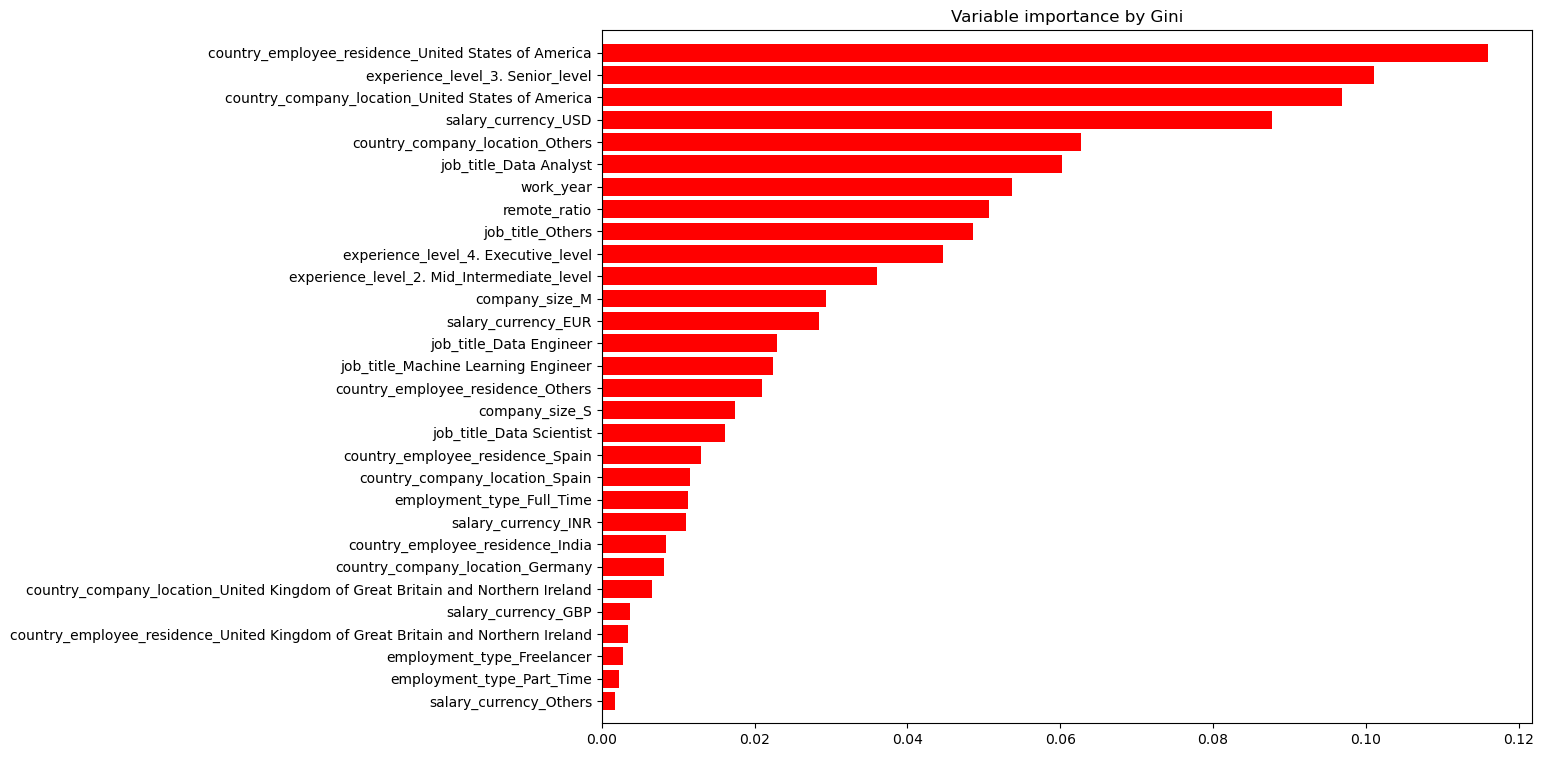

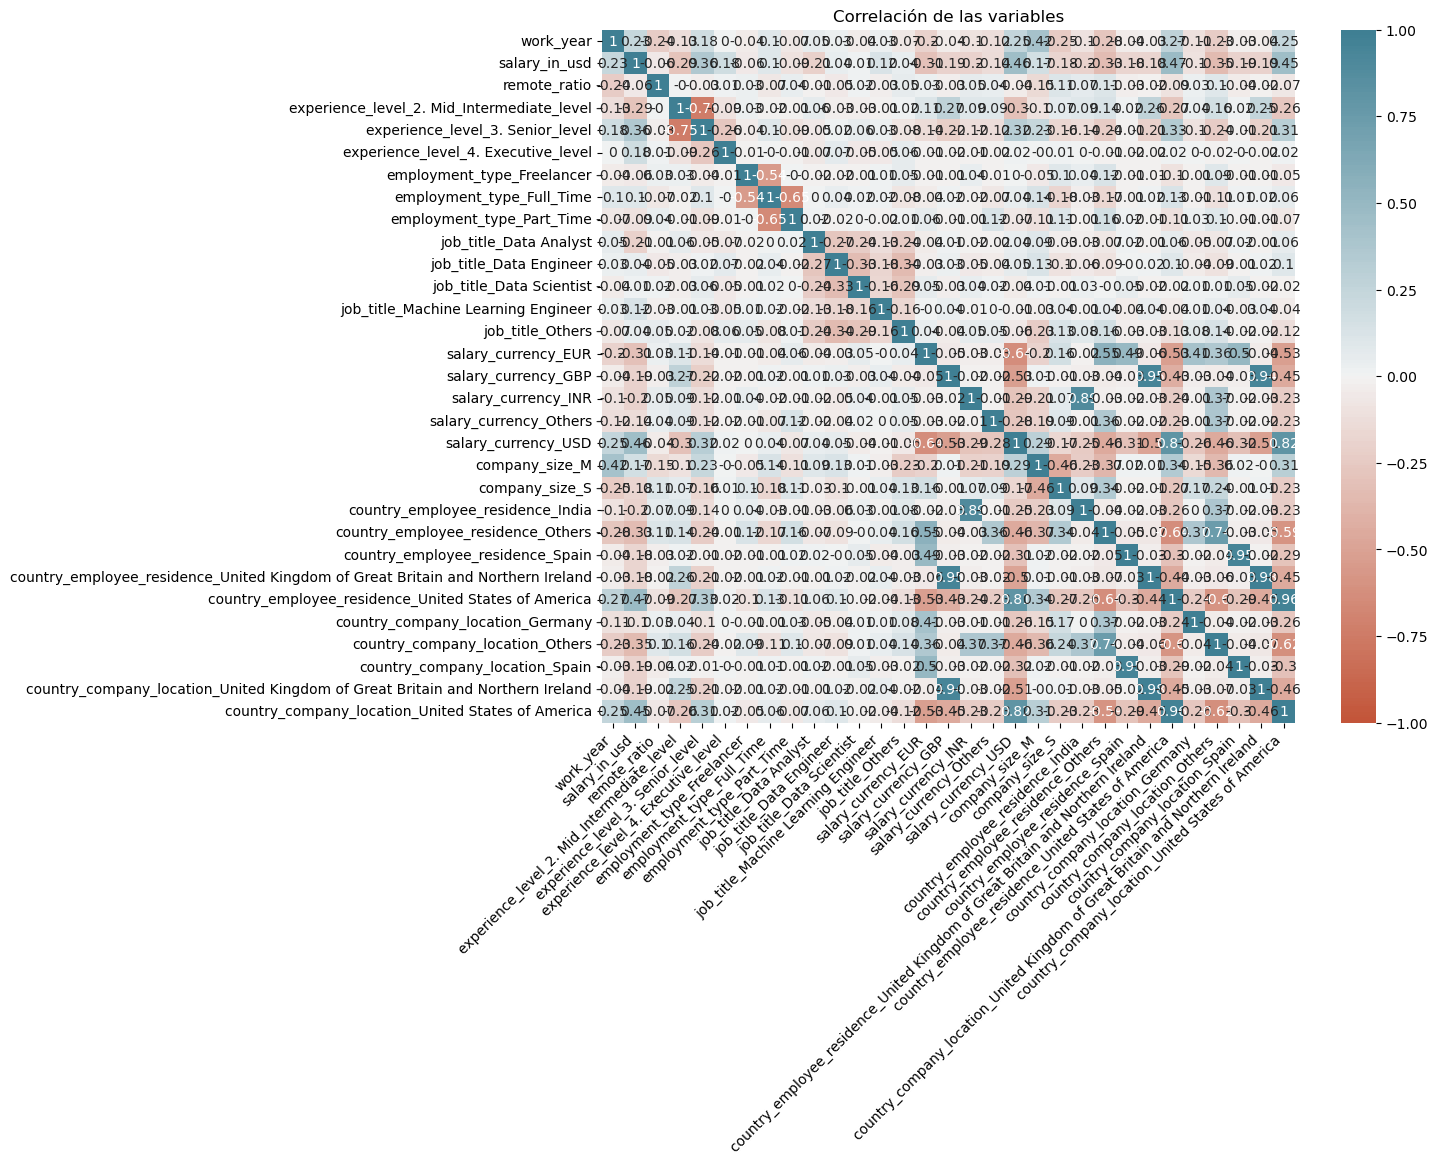

In [116]:
print('Performing model optimizations')
best_r2 = 0
best_reg = 0
best_gs = ''
#index=pais[country]
#df1=df[df['country']==index]
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    # Fit grid search
    gs.fit(x_train, y_train)
    # Best params
    print('Best params: %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training R2: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(x_test)
    # Test data accuracy of model with best params
    print('Test set R2 score for best params: %.3f ' % r2_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    if r2_score(y_test, y_pred) > best_r2:
        best_r2 = r2_score(y_test, y_pred)
        best_gs = gs
        best_reg = idx
print('\nClassifier with best test set R2 %s' % grid_dict[best_reg])
Prueba=best_gs.best_estimator_.fit(x_test,y_test)
if best_reg==2 or best_reg==3:
    importances=abs(Prueba.named_steps[grid_dict[best_reg]].coef_)
else:
    importances=Prueba.named_steps[grid_dict[best_reg]].feature_importances_
    
# Pinta la importancia de las variables
indices = np.argsort(importances)
plt.rcParams["figure.figsize"] = (12, 9)
plt.figure()
plt.title("Variable importance by Gini")
plt.barh(range(x_train.shape[1]), importances[indices], color="r", align="center")
plt.yticks(range(x_train.shape[1]), x_train.columns[indices])
plt.ylim([-1, x_train.shape[1]])
plt.show()

df_gini=pd.DataFrame()
df_gini['Variable']= x_train.columns[indices]
df_gini['Importancia_Gini']=importances[indices]
df_gini['Indices_Gini']=indices
df_gini=df_gini.set_index('Variable')

# Pinta la matriz de correlación
corr = df.corr().round(2)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True, annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right')
ax.set_title("Correlación de las variables")
plt.rcParams["figure.figsize"] = (15, 15)
plt.show();